**Machine Learning for Smart Health Systems**</br>
Instructor: Juber Rahman</br>
**Omdena School**</br>
Course Link: https://omdena.com/course/machine-learning-for-smart-health-systems/</br>
Updated: Nov 6, 2021

# Part-1 : Supervised Classification

In [ ]:
# import the general modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Last project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import machine learning modules
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score
from warnings import simplefilter
from sklearn.metrics import confusion_matrix

In [ ]:
# import the data set from a csv file
df = pd.read_csv('/content/drive/MyDrive/Omdena Course/Smart Health/week 2/MLSH-lab2-dataset.csv')
df.head()

,NN_RR,AVNN,IHR,SDNN,SDANN,SDNNIDX,rMSSD,pNN10,pNN20,pNN30,pNN40,pNN50,tot_pwr,ULF,VLF,LF,HF,LF_HF,LF_n,HF_n,oahi,pctlt90,pctlt85,pctlt80,pctlt75,age_s2,ess_s2,fosq,bmi_s2,gender,race
0,0.999970,836.336,71.741501,74.9342,45.5641,55.4628,25.1387,61.3931,29.6775,16.4170,6.17343,3.44122,5852.65,2675.950,2082.66,847.965,246.077,3.44593,0.775075,0.224925,19.23,10,4,1,0,61,10.0,9.58,35.451050,2,3
1,0.999680,980.794,61.174926,86.4631,57.3369,55.6853,26.9386,60.9649,26.4666,14.1151,6.12600,3.87186,8793.63,4467.600,3145.01,985.214,195.798,5.03179,0.834212,0.165788,1.28,0,0,0,0,46,1.0,11.68,28.546713,1,1
2,0.993108,1000.260,59.984404,59.7562,32.5391,47.8997,31.0587,59.4547,29.5596,19.1820,10.53270,7.39094,3723.20,1336.050,1322.78,802.306,262.058,3.06156,0.753789,0.246211,0.48,0,0,0,0,65,8.0,11.28,27.029866,2,1
3,0.959997,787.438,76.196475,59.2220,27.0160,39.2539,43.5362,29.7286,13.7209,12.5419,11.46800,10.68200,2813.47,761.872,1339.35,361.275,350.971,1.02936,0.507233,0.492767,10.80,3,0,0,0,77,3.0,11.82,21.572978,2,1
4,0.999689,973.366,61.641767,117.9690,67.9543,89.0453,73.9128,86.7052,72.8064,63.7922,51.80280,44.24510,14734.80,6590.450,4729.39,2354.480,1060.520,2.22012,0.689452,0.310548,0.20,6,0,0,0,54,11.0,11.96,25.330237,1,1


In [ ]:
df['label'] = np.where(df['oahi']>15, 'Severe', 'Mild')

In [ ]:
# inspect the distribution of the target variable
df.label.value_counts()
# imbalanced classification

Mild      395
Severe     98
Name: label, dtype: int64

In [ ]:
# inspect the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NN_RR    493 non-null    float64
 1   AVNN     493 non-null    float64
 2   IHR      493 non-null    float64
 3   SDNN     493 non-null    float64
 4   SDANN    493 non-null    float64
 5   SDNNIDX  493 non-null    float64
 6   rMSSD    493 non-null    float64
 7   pNN10    493 non-null    float64
 8   pNN20    493 non-null    float64
 9   pNN30    493 non-null    float64
 10  pNN40    493 non-null    float64
 11  pNN50    493 non-null    float64
 12  tot_pwr  493 non-null    float64
 13  ULF      493 non-null    float64
 14  VLF      493 non-null    float64
 15  LF       493 non-null    float64
 16  HF       493 non-null    float64
 17  LF_HF    493 non-null    float64
 18  LF_n     493 non-null    float64
 19  HF_n     493 non-null    float64
 20  oahi     493 non-null    float64
 21  pctlt90  493 non

In [ ]:
# how many null values?
df.isna().sum()

NN_RR        0
AVNN         0
IHR          0
SDNN         0
SDANN        0
SDNNIDX      0
rMSSD        0
pNN10        0
pNN20        0
pNN30        0
pNN40        0
pNN50        0
tot_pwr      0
ULF          0
VLF          0
LF           0
HF           0
LF_HF        0
LF_n         0
HF_n         0
oahi         0
pctlt90      0
pctlt85      0
pctlt80      0
pctlt75      0
age_s2       0
ess_s2       7
fosq       297
bmi_s2       2
gender       0
race         0
label        0
dtype: int64

In [ ]:
# drop the column with more than 50% null values
df.drop('fosq', axis=1, inplace=True)

In [ ]:
# impute the missing values( if missing is less than 50%)
# mean, mode, KNN imputation technique
df.ess_s2 = df.ess_s2.fillna(df.ess_s2.mean())
df.bmi_s2 = df.bmi_s2.fillna(df.bmi_s2.mean())

In [ ]:
df.isna().sum() # re-check

NN_RR      0
AVNN       0
IHR        0
SDNN       0
SDANN      0
SDNNIDX    0
rMSSD      0
pNN10      0
pNN20      0
pNN30      0
pNN40      0
pNN50      0
tot_pwr    0
ULF        0
VLF        0
LF         0
HF         0
LF_HF      0
LF_n       0
HF_n       0
oahi       0
pctlt90    0
pctlt85    0
pctlt80    0
pctlt75    0
age_s2     0
ess_s2     0
bmi_s2     0
gender     0
race       0
label      0
dtype: int64

In [ ]:
# sepearte out target and input features
X = df.drop(['label','oahi'], axis=1)
y= df.label

In [ ]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.25, random_state=10 )

In [ ]:
print(y_train.value_counts(), y_test.value_counts())

Mild      296
Severe     73
Name: label, dtype: int64 Mild      99
Severe    25
Name: label, dtype: int64


In [ ]:
# inspect target variable distribution in the train and test set
print(y_train.value_counts(), y_test.value_counts())

Mild      296
Severe     73
Name: label, dtype: int64 Mild      99
Severe    25
Name: label, dtype: int64


Q1. what happens if you don't stratify the target variable?

In [ ]:
# instatiate a linear model and check cross-validation performance
simplefilter("ignore")
model = LogisticRegression()
cv_score = cross_val_score(model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.81081081 0.83783784 0.82432432 0.7972973  0.83561644]
0.821177341725287


In [ ]:
# train the classifier and evaluate the performance in the test set
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)
# compute the accuracy
print(accuracy_score(y_test, y_predicted))
# does accuracy tell everything?- No
# visualize the confusion matrix
confusion_matrix(y_test, y_predicted, labels=['Mild','Severe'])

0.8387096774193549


array([[95,  4],
       [16,  9]])

Comment: minority class is less correctly classified. Why the model failed to learn the pattern?

In [ ]:
# check performance for support vector machine
model = SVC(kernel='rbf') # SVC(kernel='linear') #
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)
# compute the accuracy
print(accuracy_score(y_test, y_predicted))
# does accuracy tell everything?- No
# visualize the confusion matrix
confusion_matrix(y_test, y_predicted, labels=['Mild','Severe'])

0.7983870967741935


array([[99,  0],
       [25,  0]])

In [ ]:
# check performance for support vector machine
model =  SVC(kernel='rbf') # kernel-trick kernel='linear'
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)
# compute the accuracy
print(accuracy_score(y_test, y_predicted))
# does accuracy tell everything?- No
# visualize the confusion matrix
confusion_matrix(y_test, y_predicted, labels=['Mild','Severe'])

0.7983870967741935


array([[99,  0],
       [25,  0]])

In [ ]:
# check performance for ensemble models
model = RandomForestClassifier(random_state=10) #RandomForestClassifier()
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)
# compute the accuracy
print(accuracy_score(y_test, y_predicted))
# does accuracy tell everything?- No
# visualize the confusion matrix
confusion_matrix(y_test, y_predicted, labels=['Mild','Severe'])

0.8467741935483871


array([[94,  5],
       [14, 11]])

## Feature Importance

Optimal number of features : 14


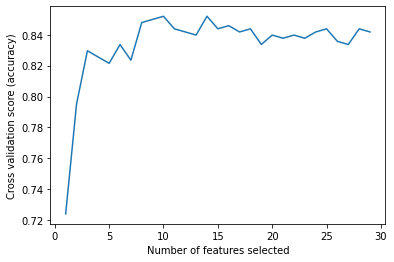

In [ ]:
# what are the important features??
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
model_rf = RandomForestClassifier()
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=model_rf,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

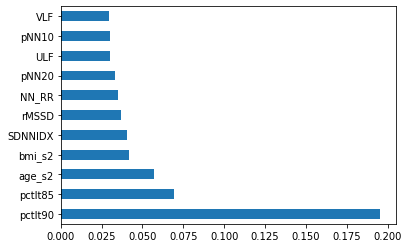

In [ ]:
# get importance
model_rf.fit(X,y)
importance = model.feature_importances_
# summarize feature importance
(pd.Series(model.feature_importances_, index=X.columns)
.nlargest(14)
.plot(kind='barh'))
plt.show()

# hyper-parameter optimization

In [ ]:
# random forest
parameters = {'n_estimators':[100, 500, 1000], 
              'max_depth':[20,500,1000, 2000],
              'max_features':[5,10,20,30]              
             }

In [ ]:
estimator_RF = RandomizedSearchCV(RandomForestClassifier(), parameters, cv = 5, scoring= 'accuracy',n_jobs=2,refit=True,
                            n_iter=1,return_train_score = True)

In [ ]:
estimator_RF = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, scoring= 'accuracy',n_jobs=2,refit=True,
                            return_train_score = True)

In [ ]:
estimator_RF.fit(X_train,y_train)

In [ ]:
estimator_RF.best_score_

In [ ]:
estimator_RF.best_params_

In [ ]:
model_rf= RandomForestClassifier()
model_rf.set_params(**estimator_RF.best_params_)

## Ensemble learning <br/>

Voting Ensemble<br/>
Stacking Ensemble <br/>

In [ ]:
estimators = [
              ('gbm', GradientBoostingClassifier()),
               ('rf', RandomForestClassifier())
               ]

In [ ]:
clf_stack_svm = StackingClassifier(
    estimators = estimators,
    final_estimator = SVC(class_weight='balanced')
)

In [ ]:
clf_stack_svm.fit(X_train,y_train)